<a href="https://colab.research.google.com/github/mgarbanzo/tallerCienciasGOES16/blob/master/TERCER_DIA_Taller_24_H_FISYMET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as plt

In [2]:
T1 = 5
T2 = 7

In [3]:
dt = 0.01
t1 = np.arange(0,100,dt)

In [4]:
y2 = 0.5 * np.exp(-1j*(2*np.pi*t1)/T1) + 0.5 * np.exp(-1j*(2*np.pi*t1)/T2)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


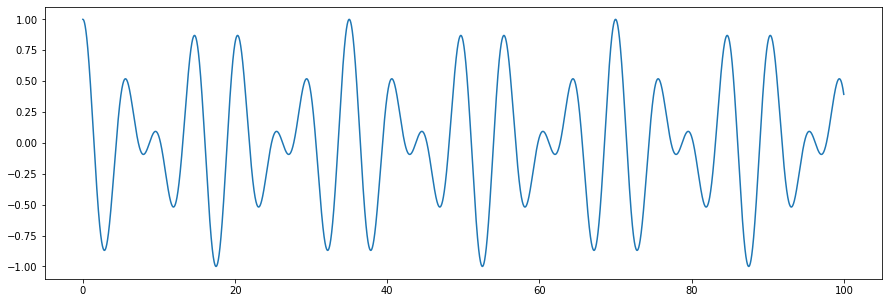

In [5]:
plt.figure(figsize=(15,5))
plt.plot(t1,y2)

In [6]:
W = np.hamming(len(y2))

In [11]:
FT2 = np.fft.fft(y2, n=len(y2))

In [12]:
XFT = np.fft.fftfreq(len(FT2),d=dt)

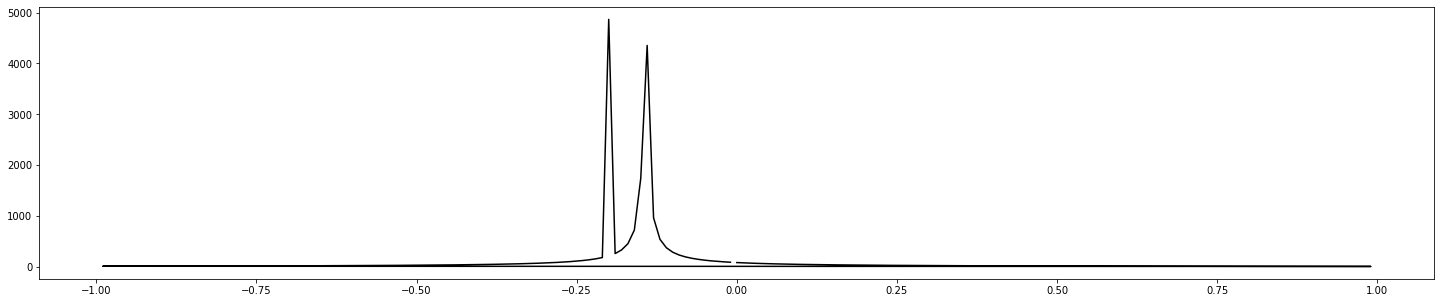

In [13]:
plt.figure(figsize=(25,5))
plt.plot(XFT[np.abs(XFT)<1],np.abs(FT2[np.abs(XFT)<1]),'-k')

In [15]:
FILTRO = .5*np.ones_like(XFT) + .5*np.ones_like(XFT)*1j

In [16]:
FILTRO[XFT>1/6] = 0 + 0*1j
FILTRO[XFT<-1/6] = 0 + 0*1j

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


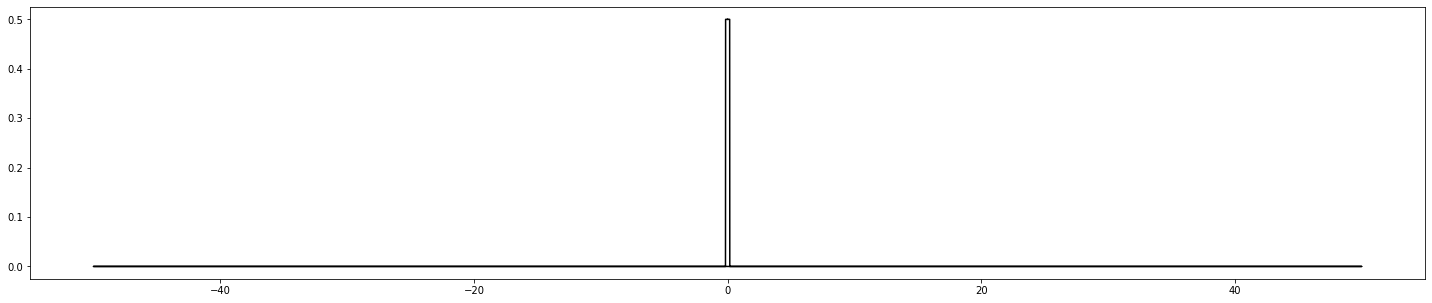

In [17]:
plt.figure(figsize=(25,5))
plt.plot(XFT,FILTRO,'-k')

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


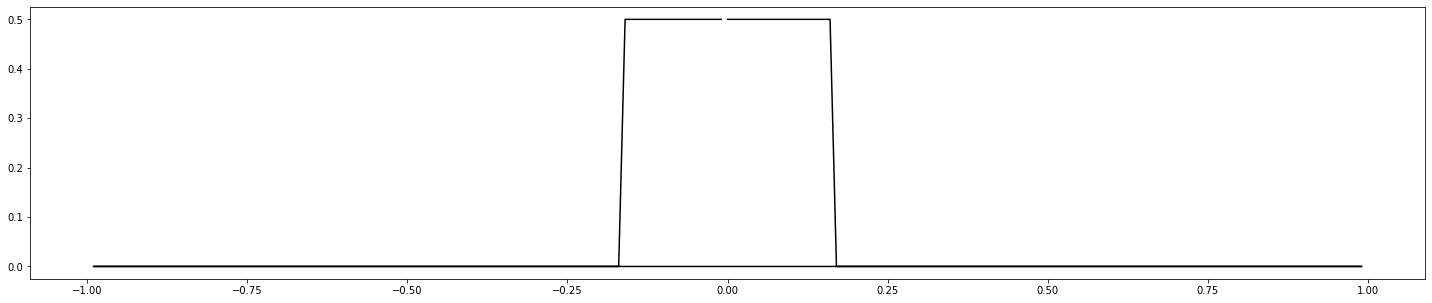

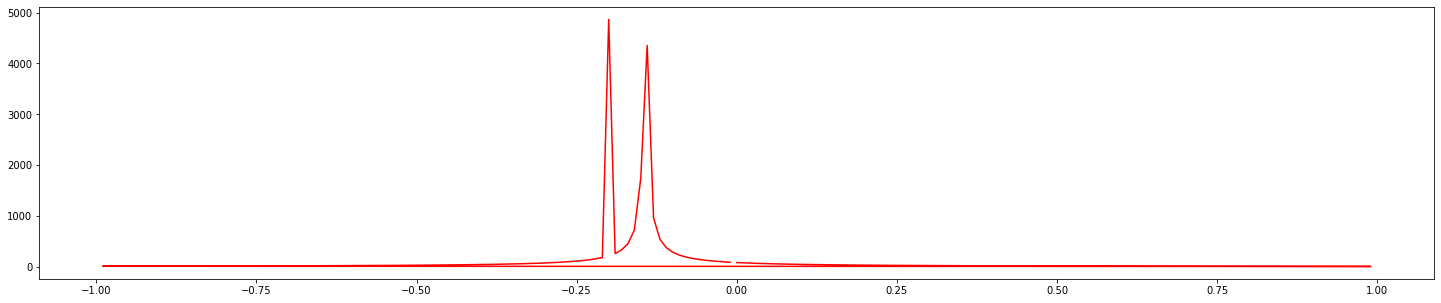

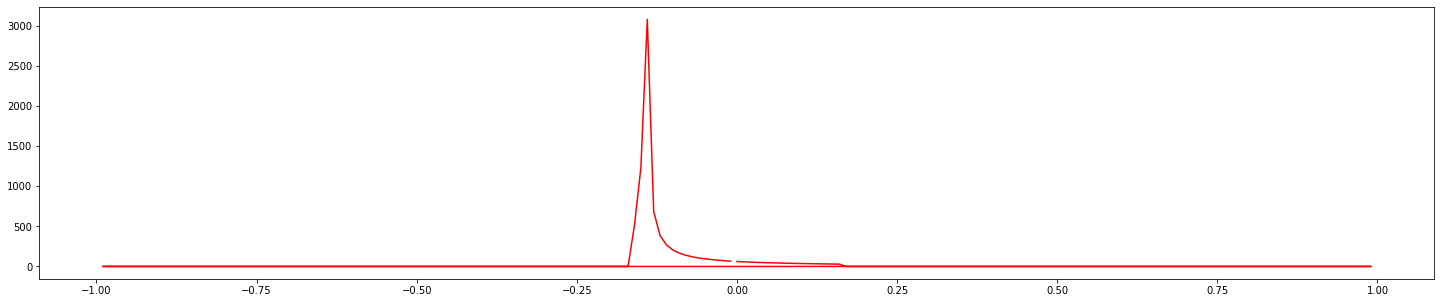

In [19]:
plt.figure(figsize=(25,5))
plt.plot(XFT[np.abs(XFT)<1],FILTRO[np.abs(XFT)<1],'-k')
plt.figure(figsize=(25,5))
plt.plot(XFT[np.abs(XFT)<1],np.abs(FT2[np.abs(XFT)<1]),'-r')
plt.figure(figsize=(25,5))
R = FILTRO * FT2
plt.plot(XFT[np.abs(XFT)<1],np.abs(R[np.abs(XFT)<1]),'-r')

In [20]:
newy2 = np.fft.ifft(R)

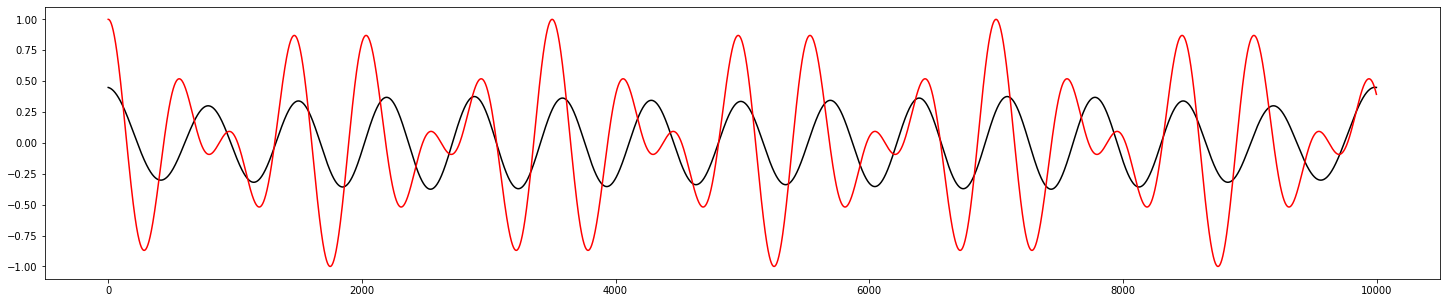

In [23]:
plt.figure(figsize=(25,5))
plt.plot(np.real(newy2),'-k')
plt.plot(np.real(y2),'-r')

# Datos reales de estación

In [24]:
import numpy as np
import pylab as plt
import pandas as pd

In [25]:
datosGuanacaste = pd.read_csv('/content/EstacionUCR_SantaCruz.txt', delimiter=' ')

In [26]:
datosGuanacaste

,FechaHora,Pres(hPa),PresLogger(hPa),Temp(C),TempLogger(F),Hum(%),HumLogger(%),Precip(in),Viento(mph),DirViento
0,2019-01-17T19:12:50Z,1007.18,1008.07,34.24,107.75,39.96,25.36,0.0,10.7,West
1,2019-01-17T19:12:55Z,1007.30,1007.92,34.60,107.75,38.76,25.39,0.0,21.5,West
2,2019-01-17T19:13:00Z,1007.39,1008.01,34.55,107.81,38.12,25.42,0.0,20.0,West
3,2019-01-17T19:13:05Z,1007.35,1007.95,34.46,107.81,37.87,25.42,0.0,18.4,West
4,2019-01-17T19:13:10Z,1007.28,1008.11,34.52,107.77,37.88,25.44,0.0,18.4,NoWind
...,...,...,...,...,...,...,...,...,...,...
1403040,2019-04-08T23:59:35Z,1005.57,1005.88,31.96,93.81,57.48,41.71,0.0,4.6,East
1403041,2019-04-08T23:59:39Z,1005.57,1005.93,31.96,93.79,57.48,41.72,0.0,6.5,East
1403042,2019-04-08T23:59:45Z,1005.57,1005.93,31.84,93.79,57.90,41.78,0.0,3.1,NoWind
1403043,2019-04-08T23:59:50Z,1005.57,1005.88,31.74,93.79,57.84,41.75,0.0,4.6,NoWind


In [27]:
pres = datosGuanacaste['Pres(hPa)']
temp = datosGuanacaste['Temp(C)']

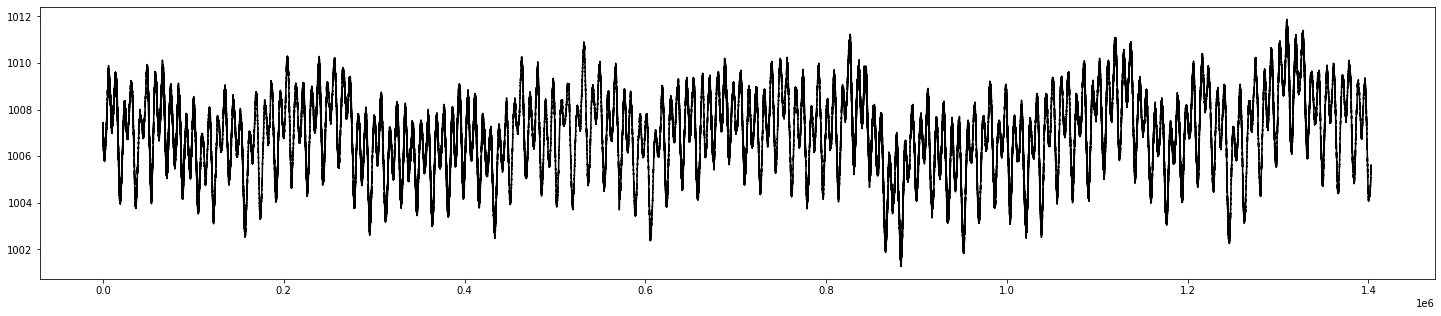

In [28]:
plt.figure(figsize=(25,5))
plt.plot(pres,'-k')

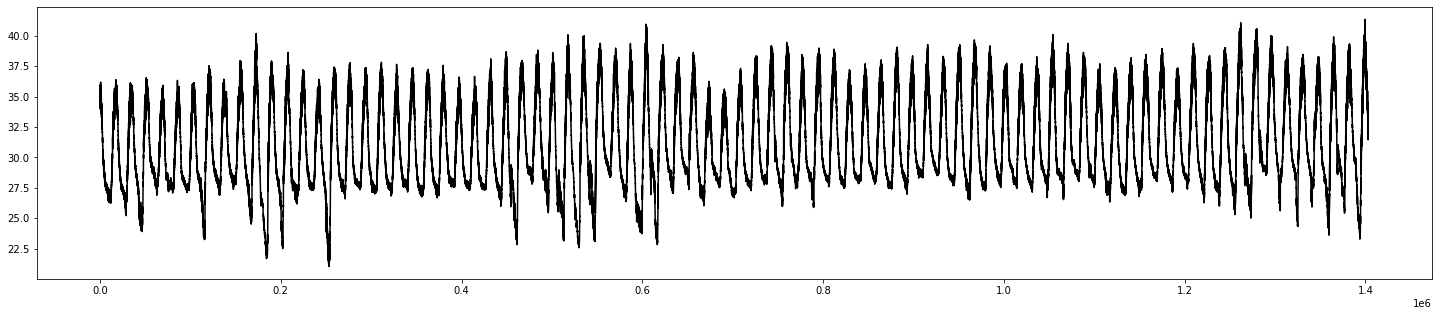

In [29]:
plt.figure(figsize=(25,5))
plt.plot(temp,'-k')

# TEMP

In [32]:
%timeit FTtemp = np.fft.fft(temp)

1 loop, best of 3: 479 ms per loop


In [33]:
XFT = np.fft.fftfreq(len(FTtemp),d=5)

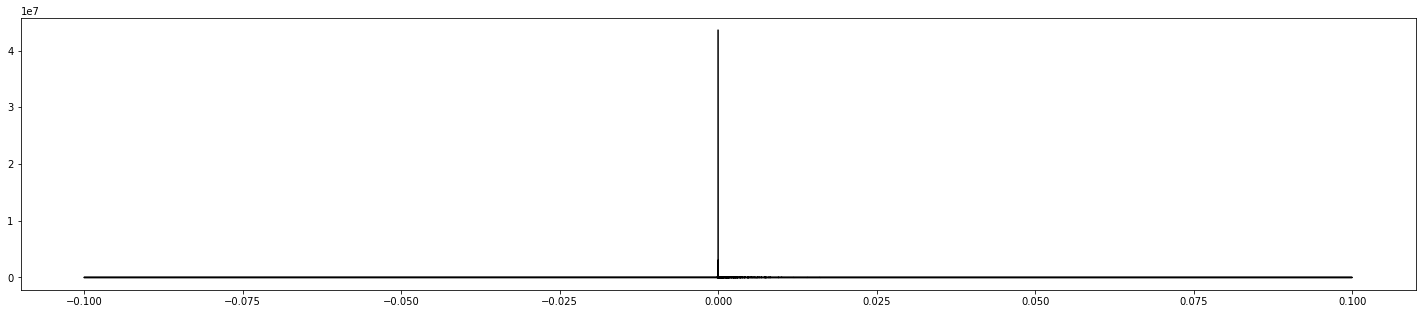

In [34]:
plt.figure(figsize=(25,5))
plt.plot(XFT,np.abs(FTtemp),'-k')

In [35]:
FTtemp = np.fft.fft(temp - np.mean(temp))

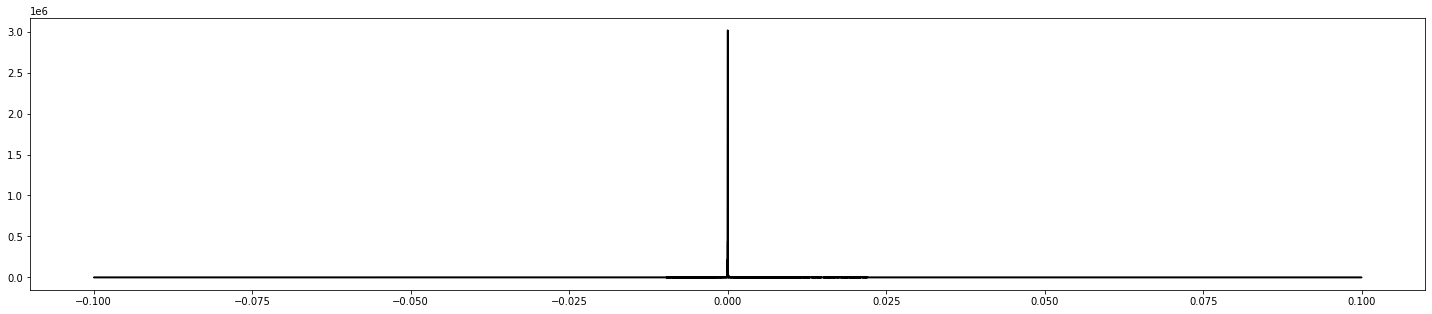

In [36]:
plt.figure(figsize=(25,5))
plt.plot(XFT,np.abs(FTtemp),'-k')

In [37]:
I = np.multiply(XFT>=0, XFT<1/600) # 600 s son 10 minutos

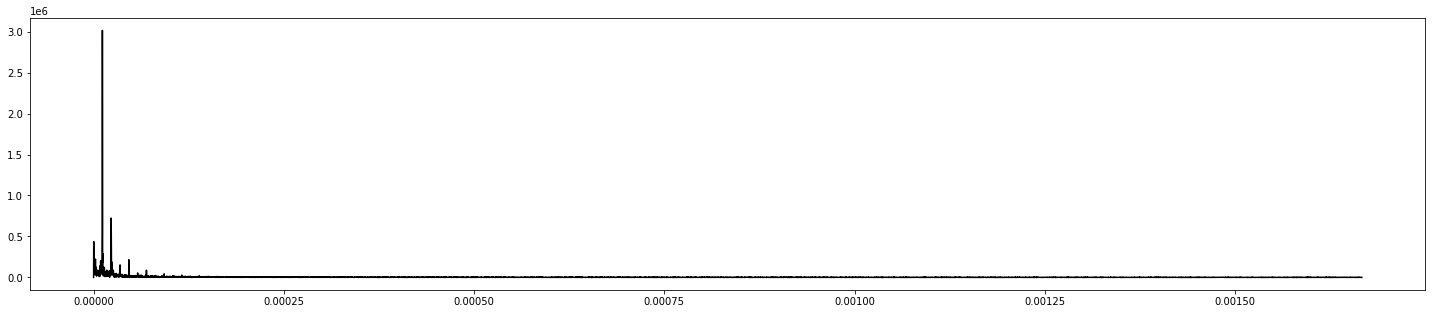

In [38]:
plt.figure(figsize=(25,5))
plt.plot(XFT[I],np.abs(FTtemp[I]),'-k')

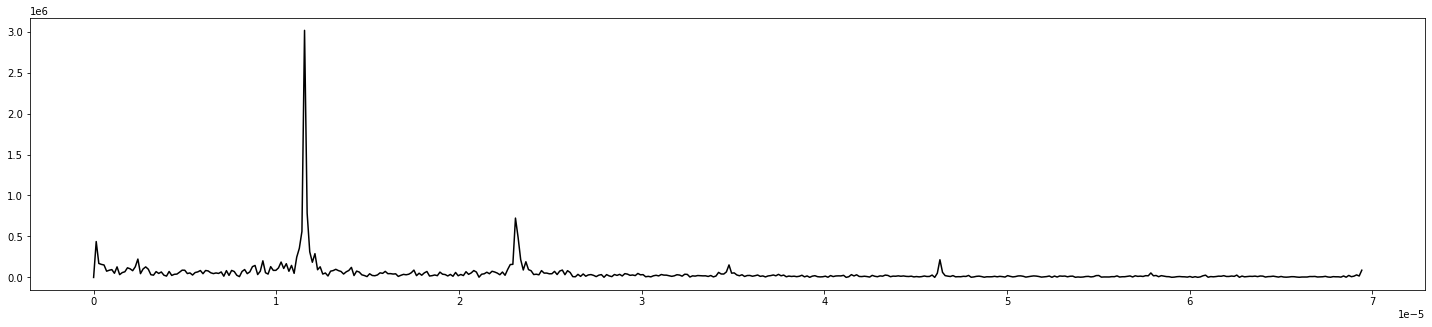

In [39]:
plt.figure(figsize=(25,5))
I = np.multiply(XFT>=0, XFT<1/14400) # 14400 s son 4 horas
plt.plot(XFT[I],np.abs(FTtemp[I]),'-k')

In [40]:
MAX = np.amax(FTtemp)
print(MAX)

(2590494.4735284853+1542476.6366756323j)


In [41]:
XMAX = XFT[np.where(FTtemp == MAX)]
print(XMAX)

[1.15463153e-05]


In [42]:
print(1/XMAX)

[86607.71604938]


In [43]:
24*60*60

86400

# Presión

In [44]:
W = np.hamming(len(pres))

In [45]:
newPres = W * (pres - np.mean(pres))

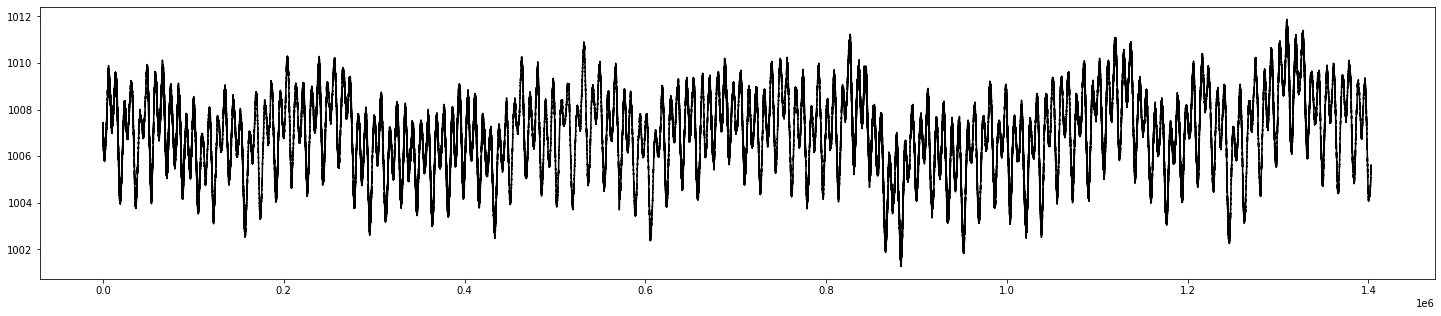

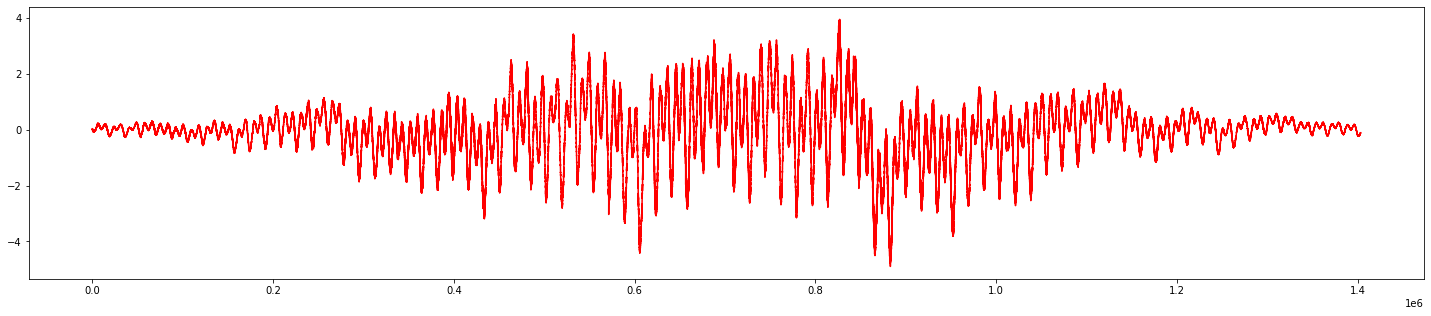

In [46]:
plt.figure(figsize=(25,5))
plt.plot(pres,'-k')
plt.figure(figsize=(25,5))
plt.plot(newPres,'-r')

In [48]:
%timeit FTpres = np.fft.fft(newPres)

1 loop, best of 3: 474 ms per loop


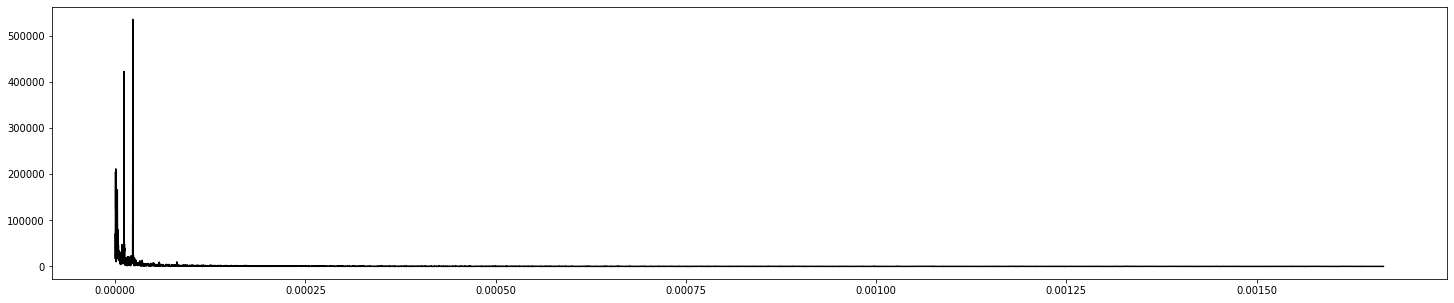

In [49]:
plt.figure(figsize=(25,5))
I = np.multiply(XFT>=0, XFT<1/600)
plt.plot(XFT[I],np.abs(FTpres[I]),'-k')

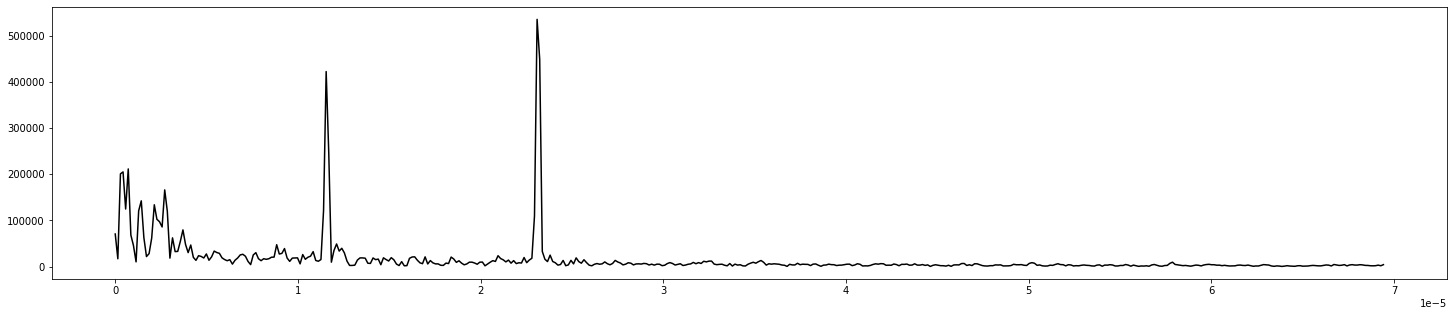

In [50]:
plt.figure(figsize=(25,5))
I = np.multiply(XFT>=0, XFT<1/14400)
plt.plot(XFT[I],np.abs(FTpres[I]),'-k')

In [51]:
MAX = np.amax(FTpres)
print(MAX)

(444510.7092001129+63443.06057862821j)


In [52]:
XMAX = XFT[np.where(FTpres == MAX)]
print(XMAX)

[2.32351778e-05]


In [53]:
print(1/XMAX)

[43038.19018405]


In [54]:
12*60*60

43200

# Conclusión

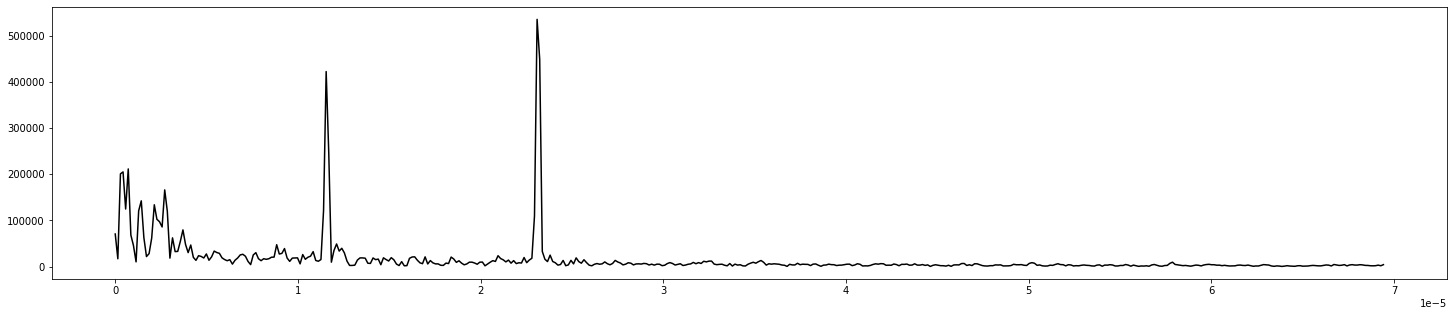

In [56]:
plt.figure(figsize=(25,5))
I = np.multiply(XFT>=0, XFT<1/14400)
plt.plot(XFT[I],np.abs(FTpres[I]),'-k')

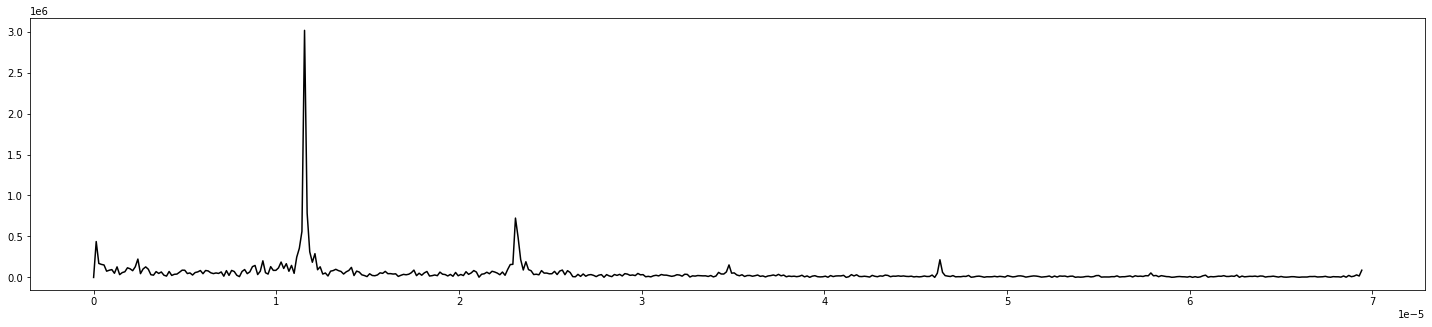

In [57]:
plt.figure(figsize=(25,5))
I = np.multiply(XFT>=0, XFT<1/14400)
plt.plot(XFT[I],np.abs(FTtemp[I]),'-k')